# END TERM MACHINE LEARNING PROJECT

# PIMA INDIAN DIABETES DATASET

# SEMESTER -5

# DS-V-A

# PREPARED BY:

## ADITYA(18CSU011)

## AMAN(18CSU015)

## DEEPANSHU(18CSU059)


## DEVESH(18CSU061)

In [1]:
#import the useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as np
import matplotlib
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

C:\Users\Acer\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Acer\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
# reading the dataset
df = pd.read_csv("Diabetes.csv")

In [3]:
# showing the features of dataset
df.keys()

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [4]:
# returns no. of rows and columns
df.shape

(768, 10)

In [5]:
# To display top 5 rows
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0.0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0.0,26.6,0.351,31,1.1426,NaN
2,8,183,64,0,0.0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94.0,28.1,0.167,21,0.9062,False
4,0,137,40,35,168.0,43.1,2.288,33,1.3790,True


In [6]:
# tells us about the statistical data
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,764.000000,768.000000,731.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.870419,31.992578,0.472880,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.433301,7.884160,0.334589,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.368000,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.630500,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [7]:
# Gives info about data type and missing or null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         764 non-null float64
bmi             768 non-null float64
diab_pred       731 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        735 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 60.1+ KB


### CHECKING FOR NULL VALUES

In [8]:
df.isnull().values.any()

True

In [9]:
df.isnull().sum()

num_preg         0
glucose_conc     0
diastolic_bp     0
thickness        0
insulin          4
bmi              0
diab_pred       37
age              0
skin             0
diabetes        33
dtype: int64

### REMOVING NULL VALUES

In [10]:
# Removing null values by filling in mean

In [11]:
df['diab_pred']=df['diab_pred'].fillna(df['diab_pred'].mean())
df['insulin']=df['insulin'].fillna(df['insulin'].mean())

In [12]:
# Removing null values by filling in mod

In [13]:
df['diabetes']=df['diabetes'].fillna(df['diabetes'].mode()[0])

In [14]:
# Checking if null values prevail 

In [15]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [16]:
#returns the first five rows of datframe
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0.0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0.0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0.0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94.0,28.1,0.167,21,0.9062,False
4,0,137,40,35,168.0,43.1,2.288,33,1.3790,True


### COUNTPLOT (TO COUNT TRUE/FALSE VALUES)

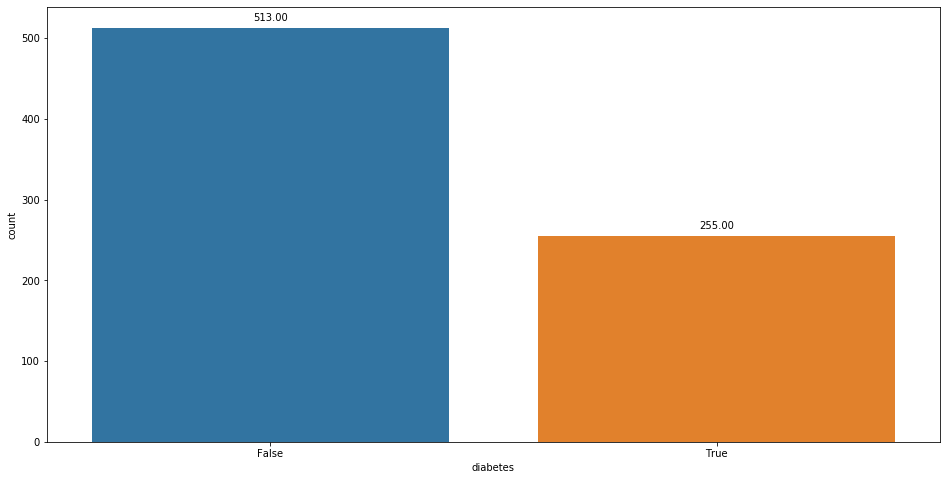

In [17]:
# Categorical attributes visulisation
plt.figure(figsize=(16, 8))
splot = sns.countplot(df['diabetes'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# BAR GRAPH ( BETWEEN AGE AND BMI)

A BMI of between 18.5 and 24.9 is ideal


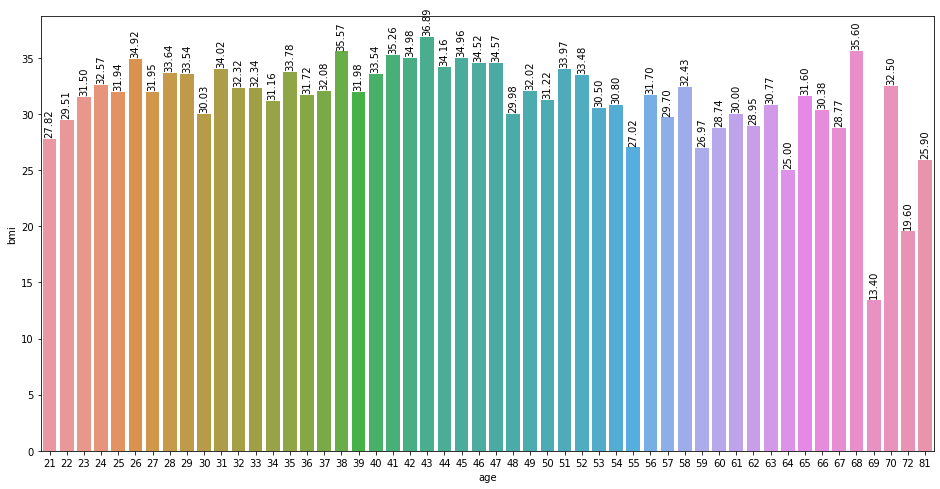

In [18]:
print("A BMI of between 18.5 and 24.9 is ideal")
plt.figure(figsize=(16,8))
splot = sns.barplot(data=df, x = 'age', y = 'bmi', ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 16), rotation = 90, textcoords = 'offset points')

# HISTOGRAM 

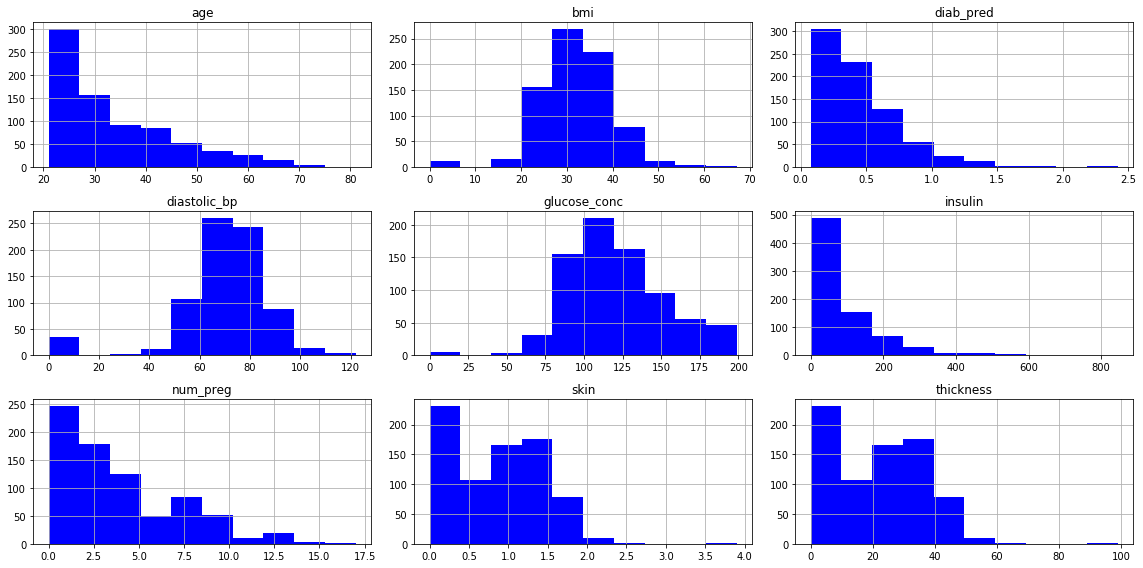

In [19]:
df[['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin']].hist(figsize=(16,8),bins=10,color='B')
plt.tight_layout()
plt.show()

# BOX PLOT

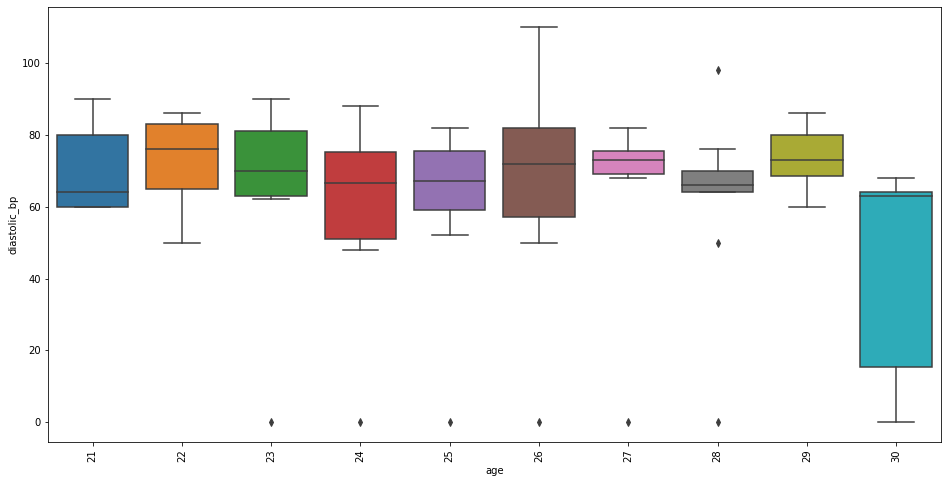

In [20]:
# person below 30 having diabetes
df_30=df[df['age']<=30]
df_30=df_30[df_30['diabetes']==True]

plt.rcParams['figure.figsize']=(16,8)
ax = sns.boxplot(x="age", y="diastolic_bp", data=df_30)
plt.xticks(rotation=90)

plt.show()

# SCATTER PLOT

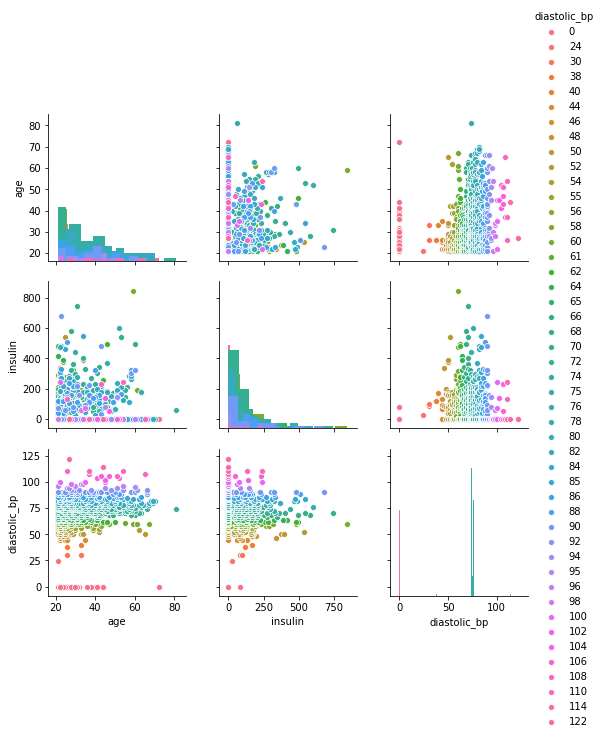

In [21]:
g = sns.pairplot(df[["age", "insulin", "diastolic_bp"]], hue="diastolic_bp", diag_kind="hist")

# LABEL-ENCODING

CHANGING THE CATEGORICAL VALUE TO NUMERICAL VALUE I.E. BOOLEAN TO NUMBER

In [22]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'diabetes'. 
df['diabetes']= label_encoder.fit_transform(df['diabetes']) 

df['diabetes'].unique() 

array([1, 0], dtype=int64)

In [23]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0.0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0.0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0.0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94.0,28.1,0.167,21,0.9062,0
4,0,137,40,35,168.0,43.1,2.288,33,1.3790,1


In [24]:
diabetes_true_count = len(df.loc[df['diabetes']==True])
diabetes_false_count = len(df.loc[df['diabetes']==False])

In [25]:
print("True count:",diabetes_true_count)
print("False count:",diabetes_false_count)

True count: 255
False count: 513


# FEATURE SELECTION

### Chi-Squared / χ2 test

Selecting best features to use for model training

In [26]:
x = df.iloc[:,0:10] #independent columns
y = df.iloc[:,-1]   #target column i.e chances of having diabetes or not [0 or 1]

In [27]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(x,y)

In [28]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [29]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [30]:
featureScores

,Specs,Score
0,num_preg,113.389232
1,glucose_conc,1354.291045
2,diastolic_bp,19.500849
3,thickness,58.976414
4,insulin,3054.124060
5,bmi,107.531673
6,diab_pred,5.512583
7,age,169.475055
8,skin,2.323671
9,diabetes,513.000000


##### Here we have total 10 features, higher the score more important the feature is, insulin has the max value thus making it the most important feature, the values that are higher are much more cor-related and important.

In [31]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs        Score
4       insulin  3054.124060
1  glucose_conc  1354.291045
9      diabetes   513.000000
7           age   169.475055
0      num_preg   113.389232
5           bmi   107.531673
3     thickness    58.976414
2  diastolic_bp    19.500849
6     diab_pred     5.512583
8          skin     2.323671


In [32]:
# Visualisation of best features in Descending Order

<Figure size 360x360 with 0 Axes>

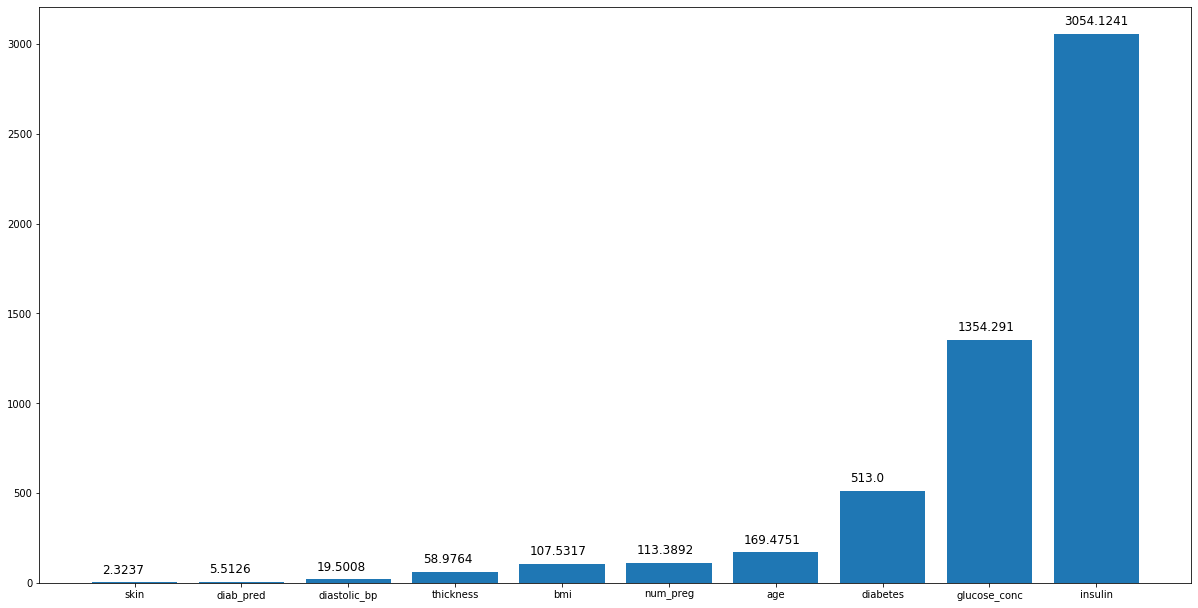

In [33]:
plt.figure(figsize=(5,5))
featureScores = featureScores.sort_values('Score')
featureScores
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(featureScores['Specs'],featureScores['Score'])
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height()+51, \
            str(round((i.get_height()/100)*100, 4)), fontsize=12,
                color='black',rotation=0)
plt.show()

# TRAIN - TEST SPLITING DATA

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df.keys()

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

From all the 10 features we use the best 6 features for our dataset i.e. 
('num_preg', 'glucose_conc', 'thickness', 'insulin','bmi', 'age') 
and we use ("diabetes") as predicted column.

In [36]:
feature_columns = ['num_preg', 'glucose_conc', 'thickness', 'insulin','bmi', 'age']
predicted_column = ['diabetes']

In [37]:
x = df[feature_columns].values
y = df[predicted_column].values

In [38]:
# we split training and test data into 20-80 rato and add random state = 5

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = 0.20 ,random_state = 5)

In [40]:
# here we use standard scaler as it ransforms the data in such a manner that it has mean as 0 and standard deviation as 1.
# It arranges the data in a standard normal distribution and is useful in classification than regression.

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [42]:
print("X_train = ",X_train.shape ,", X_test =" , X_test.shape)

X_train =  (614, 6) , X_test = (154, 6)


In [43]:
X_train , X_test

(array([[-0.24152934,  0.22455976, -1.31684684, -0.71865847, -1.35714472,
          1.82612138],
        [ 2.41721789, -1.05299125,  1.2187673 , -0.24068439,  0.41977309,
          1.23838215],
        [ 1.82638517, -0.41421574, -1.31684684, -0.71865847,  0.05688142,
          0.73460566],
        ...,
        [ 0.05388702, -0.76554227,  0.14113129, -0.71865847, -0.46868582,
         -0.94464928],
        [ 0.64471974,  0.12874343,  0.64825412, -0.71865847, -0.54376685,
          1.32234489],
        [ 1.23555246,  2.39639647,  0.52147341,  1.75972568,  0.69507021,
          1.99404687]]),
 array([[ 6.44719740e-01, -9.25236147e-01,  7.11644472e-01,
          3.96614398e-01,  6.82740132e-03,  1.07045665e+00],
        [ 3.49303382e-01,  3.52314861e-01, -1.31684684e+00,
         -7.18658473e-01, -6.43874895e-01,  3.00159984e+00],
        [-2.41529335e-01, -4.78093295e-01, -1.31684684e+00,
         -7.18658473e-01, -7.69009952e-01, -5.24835543e-01],
        [ 5.38870230e-02, -7.01664721e-0

In [44]:
y_train , y_test

(array([[0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],

In [45]:
df.keys()

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [46]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}" .format(len(df.loc[df['diastolic_bp'] == 0])))
print("number of rows missing thickness: {0}" .format(len(df.loc[df['thickness'] == 0])))
print("number of rows missing insulin: {0}" .format(len(df.loc[df['insulin'] == 0])))
print("number of rows missing bmi: {0}" .format(len(df.loc[df['bmi'] == 0])))
print("number of rows missing diab_pred: {0}" .format(len(df.loc[df['diab_pred'] == 0])))
print("number of rows missing age: {0}" .format(len(df.loc[df['age'] == 0])))
print("number of rows missing skin: {0}" .format(len(df.loc[df['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing thickness: 227
number of rows missing insulin: 372
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [47]:
from sklearn.preprocessing import Imputer
fill_values = Imputer(missing_values=0, strategy = "mean" , axis=0)

In [48]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == "mean"])))
print("number of rows missing diastolic_bp: {0}" .format(len(df.loc[df['diastolic_bp'] == "mean"])))
print("number of rows missing thickness: {0}" .format(len(df.loc[df['thickness'] == "mean"])))
print("number of rows missing insulin: {0}" .format(len(df.loc[df['insulin'] == "mean"])))
print("number of rows missing bmi: {0}" .format(len(df.loc[df['bmi'] == "mean"])))
print("number of rows missing diab_pred: {0}" .format(len(df.loc[df['diab_pred'] == "mean"])))
print("number of rows missing age: {0}" .format(len(df.loc[df['age'] == "mean"])))
print("number of rows missing skin: {0}" .format(len(df.loc[df['skin'] == "mean"])))

total number of rows : 768
number of rows missing glucose_conc: 0
number of rows missing diastolic_bp: 0
number of rows missing thickness: 0
number of rows missing insulin: 0
number of rows missing bmi: 0
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 0


In [49]:
X_train = fill_values.fit_transform(x_train)
X_test = fill_values.fit_transform(x_test)

# Classifier

1. Random Forest Classifier
2. XgBoost Classifier
3. SVM
4. Logistic Regression 
5. KNN Classifier / Cross Validation
6. Gradient Descent

# RANDOM FOREST CLASSIFIER

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [52]:
print(model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


In [53]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Accuracy

In [54]:
print("Accuracy ", model.score(X_test, y_test)*100)

Accuracy  77.92207792207793


# XGBOOST CLASSIFIER

In [55]:
from xgboost import XGBClassifier

In [56]:
# fit model no training data
model = XGBClassifier(random_state=20)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=20, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [57]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=20, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)


In [58]:
# make predictions for test data
y_pred = model.predict(X_test)

## Accuracy

In [59]:
# evaluate predictions
accuracy = model.score(X_test,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.08%


# ADABOOST CLASSIFIER

In [60]:
from numpy import mean
from numpy import std

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [63]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

In [64]:
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                n_estimators=200)
classifier.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
confusion_matrix(y_test, y_pred)

array([[80, 22],
       [15, 37]], dtype=int64)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       102
           1       0.63      0.71      0.67        52

   micro avg       0.76      0.76      0.76       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



## Accuracy 

In [68]:
x, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.2f (%.2f)' % (mean(n_scores)*100, std(n_scores)))

Accuracy: 80.83 (0.04)


# SVM - Linear SVC (Support vector classifier)

In [69]:
# Linear kernel has some advantages but probably (in my opinion) the most significant one is the fact that generally is way faster to train in comparison with non-linear kernels such as RBF.

In [70]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [71]:
print(model)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [72]:
# make predictions for test data
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[102,   0],
       [ 52,   0]], dtype=int64)

## Accuracy

In [74]:
# evaluate predictions
accuracy = model.score(X_test,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.23%


# LOGISTIC REGRESSION

In [75]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
y_predict_train = classifier.predict(X_train)

In [77]:
y_predict_test = classifier.predict(X_test)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       102
           1       0.71      0.58      0.64        52

   micro avg       0.78      0.78      0.78       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



## Accuracy

In [79]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test)*100)

Accuracy: 77.92207792207793


# KNN CLASSIFIER USING CV

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

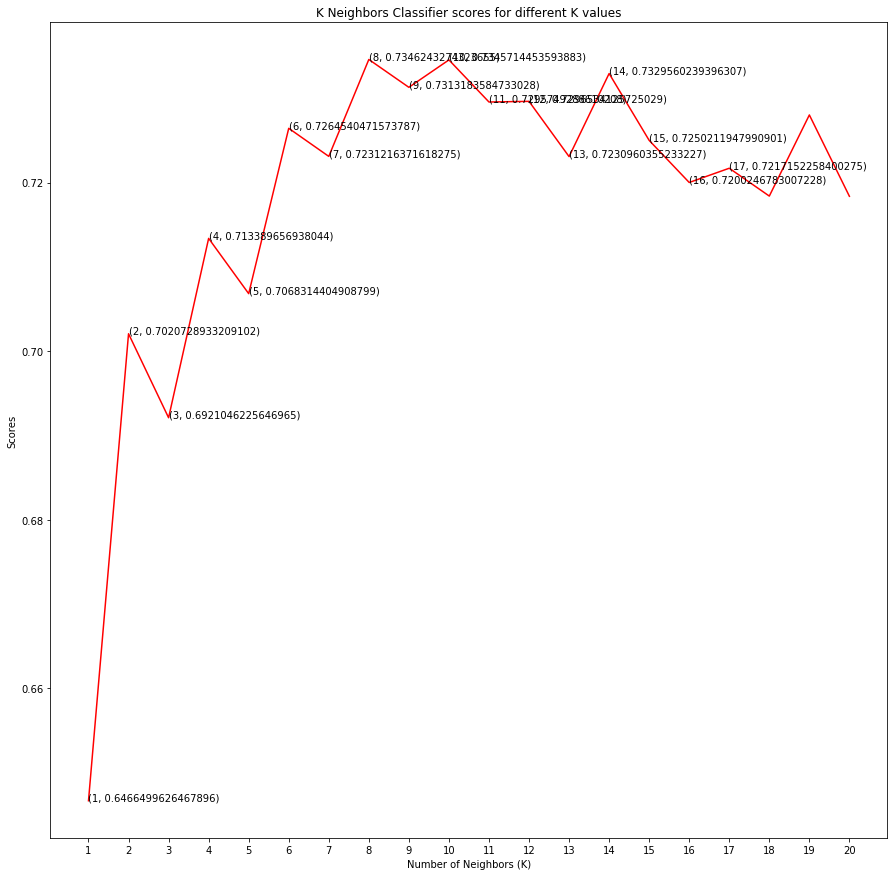

In [82]:
plt.figure(figsize=(15,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,18):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [83]:
knn_classifier = KNeighborsClassifier(n_neighbors = 20)
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)

## Accuracy / Score

In [84]:
#evaluting predictions
score.mean()
print("Accuracy: %.2f%%" % (score.mean() * 100.0))

Accuracy: 71.84%


# Hyper Parameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

AttributeError: module 'matplotlib.pyplot' has no attribute 'arange'

## Accuracy

In [ ]:
print("Score: %.2f%%" % knn_cv.best_score_," ",knn_cv.best_params_)

# GRADIENT DESCENT CLASSIFIER

Accuracy  75.97402597402598


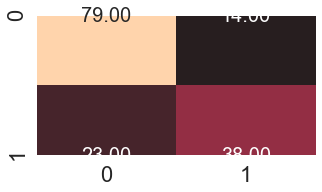

In [86]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
#Model
model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.set(font_scale=2)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, center=10, fmt='.2f' , annot_kws={'size':20} , cbar=False ,square=True)
plt.show()

In [87]:
from sklearn.tree import DecisionTreeClassifier
abc=[]
classifiers=['RandomForestClassifier','XGBClassifier','SVC',
             'Logistic Regression','KNN','GradientBoostingClassifier']
models=[SVC(),LogisticRegression(),GradientBoostingClassifier(),
        XGBClassifier(),KNeighborsClassifier(n_neighbors=20),
        RandomForestClassifier()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
RandomForestClassifier,0.662338
XGBClassifier,0.779221
SVC,0.759740
Logistic Regression,0.720779
KNN,0.720779
GradientBoostingClassifier,0.772727


# REGRESSION

In [88]:
model_name=[]
scores=[]
rmse=[]

In [89]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Finding Highly Correlated Features / Correlation

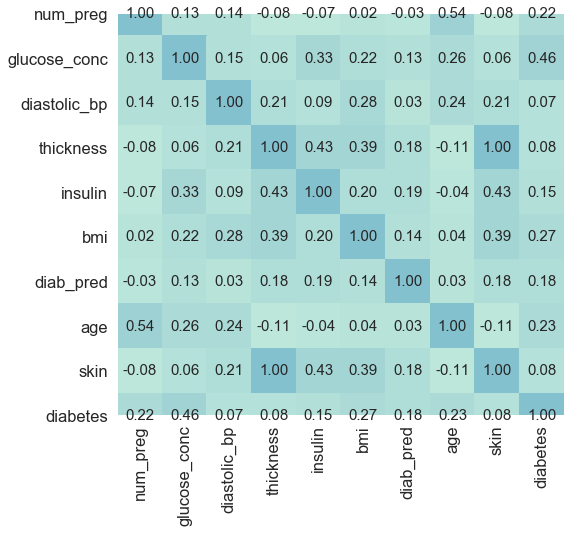

In [90]:
#Using Pearson Correlation
corr = df.corr()
plt.figure(figsize=(8,10))
sns.set(font_scale= 1.5)
ax = sns.heatmap(corr, annot=True, center = 7, fmt='.2f' , annot_kws={'size':15} , cbar=False ,square=True)

In [91]:
# Sorting in Descending order

In [92]:
corr_matrix = df.corr()
corr_matrix["diabetes"].sort_values(ascending=False)

diabetes        1.000000
glucose_conc    0.456966
bmi             0.268621
age             0.230449
num_preg        0.223750
diab_pred       0.178599
insulin         0.154897
skin            0.078774
thickness       0.078774
diastolic_bp    0.068482
Name: diabetes, dtype: float64

In [93]:
df.keys()

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [94]:
# As we first selected two columns for regression, so we decided to use new Dataframe i.e. P & Q ... and we spilt this into 
# Training and Test data.

In [95]:
P =pd.DataFrame(df['bmi'])
Q =pd.DataFrame(df['age'])

In [96]:
P.head()

,bmi
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1


## Train - Test Split

In [97]:
P_train,P_test,q_train,q_test = train_test_split(P,Q,test_size=0.2)

In [98]:
# Graph depicting line passing through the datapoints ... The more data points pass near the line more is the correlation.

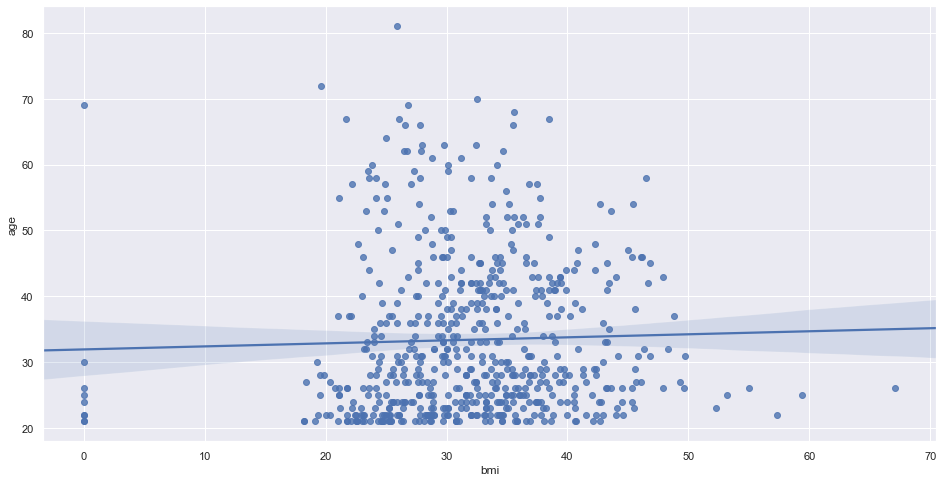

In [99]:
import seaborn as sns
sns.set(color_codes=True)

dataframe_training = pd.DataFrame()
dataframe_training['bmi'] = P_train['bmi']
dataframe_training['age'] = q_train
ax = sns.regplot(x="bmi", y="age", data= dataframe_training)

## Converting Dataframe to Array

In [100]:
import matplotlib.pyplot as plt 
import numpy as np 
P = np.array(P).reshape(-1, 1)
Q = np.array(Q).reshape(-1, 1) 

# SIMPLE LINEAR REGRESSION

In [101]:
#Fitting Simple linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
# Intercept is the expected mean value of y when all x = 0
# Coefficient tells us how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant.

In [103]:
print('Coefficients\n',regressor.coef_)

print('Intercept\n',regressor.intercept_)

Coefficients
 [[2.07521088e-02 6.16784214e-03 6.77912871e-04 6.75693246e-05
  1.10910989e-02 2.23876398e-03]]
Intercept
 [-0.97752219]


In [104]:
#Predicting the Test set results
y_pred=regressor.predict(X_test)

Error Calculation 

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Sq. Error
4. R2 Score

In [105]:
from sklearn.metrics import classification_report
mae_lin = mean_absolute_error(y_test,y_pred)
mse_lin = mean_squared_error(y_test, y_pred) 
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred)) 
r2_score_lin = r2_score(y_test, y_pred)

In [106]:
mae_lin

0.30199416235968535

In [107]:
mse_lin

0.1420342025027932

In [108]:
rmse_lin

0.3768742529051211

In [109]:
r2_score_lin

0.3649164504984458

In [110]:
# Appending scores in the list

In [111]:
model_name.append("Simple Linear Regression")
scores.append(format(r2_score(y_test,y_pred)))
rmse.append(format(mean_squared_error(y_test,y_pred)))

# Polynomial Regression

In [112]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
# The degree of an individual term of a polynomial is the exponent of its variable; Here we have used (Degree 10 – decic)
pol_reg = PolynomialFeatures(degree=10)
P_pol_reg = pol_reg.fit_transform(P)
pol_reg.fit(P_pol_reg, Q)

PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)

In [113]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression()   
lin.fit(P,Q)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [114]:
lin_reg = LinearRegression()
lin_reg.fit(P_pol_reg, Q)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

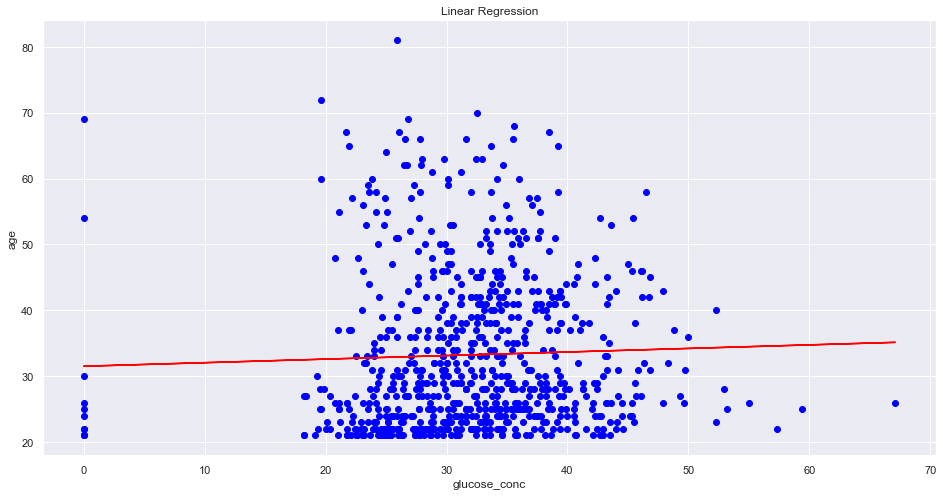

In [115]:
# Visualising the Linear Regression results 
plt.scatter(P, Q, color = 'blue')
plt.plot(P, lin.predict(P), color = 'red')
plt.title('Linear Regression')
plt.xlabel('glucose_conc')
plt.ylabel('age')
plt.show()

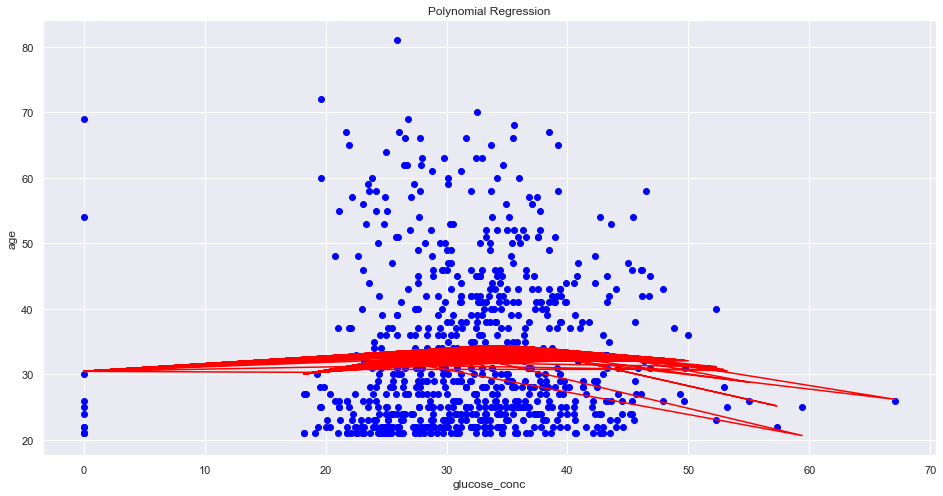

In [116]:
# Visualising the Polynomial Regression results 
plt.scatter(P,Q, color = 'blue') 
  
plt.plot(P, lin_reg.predict(pol_reg.fit_transform(P)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('glucose_conc') 
plt.ylabel('age') 
  
plt.show() 

In [117]:
pol_reg.fit(P_train, q_train)

PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)

In [118]:
q_pred = lin.predict(P)
q_pred

array([[33.32778164],
       [32.94936601],
       [32.77097007],
       [33.03045507],
       [33.84134571],
       [32.89530663],
       [33.18722726],
       [33.41968258],
       [33.16019758],
       [31.51138662],
       [33.54401914],
       [33.56564289],
       [32.9763957 ],
       [33.13857383],
       [32.90611851],
       [33.13316789],
       [33.98730602],
       [33.11154414],
       [33.85215758],
       [33.38184102],
       [33.63592008],
       [33.42508852],
       [33.66294977],
       [33.07910851],
       [33.48995977],
       [33.1926332 ],
       [33.64132602],
       [32.76556413],
       [32.71150476],
       [33.35481133],
       [33.45752414],
       [33.21966289],
       [32.85205913],
       [32.58716819],
       [33.00342539],
       [32.80881163],
       [33.30615789],
       [33.28994008],
       [33.57645477],
       [33.51698945],
       [33.34940539],
       [33.68457352],
       [32.73853445],
       [33.96568227],
       [32.99261351],
       [33

In [119]:
print('Coefficients: \n',lin.coef_)
print('Interecept :\n',lin.intercept_)

Coefficients: 
 [[0.05405938]]
Interecept :
 [31.51138662]


Error Calculation 

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Sq. Error
4. R2 Score

In [120]:
mae_pol = mean_absolute_error(Q,q_pred)
mse_pol = mean_squared_error(Q, q_pred) 
rmse_pol = np.sqrt(mean_squared_error(Q, q_pred)) 
r2_score_pol = r2_score(Q, q_pred)

In [121]:
mse_pol

137.94154299532747

In [122]:
rmse_pol

11.744851765574884

In [123]:
mae_pol

9.557287214436851

In [126]:
r2_score_pol

0.9013134731477869

In [127]:
# Appending scores in the list

In [128]:
# we need to add cross validation 
model_name.append("Polynomial Regression")
rmse.append(format(mean_squared_error(Q, q_pred)))
scores.append(r2_score_pol)

# Decision Tree Regression

In [129]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(P_train, q_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [130]:
#Predicting the Test set results
q_pred = tree_reg.predict(P_test)

Error Calculation 

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Sq. Error
4. R2 Score

In [131]:
mae_dtr = mean_absolute_error(q_test,q_pred)
mse_dtr = mean_squared_error(q_test, q_pred) 
rmse_dtr = np.sqrt(mean_squared_error(q_test, q_pred)) 
r2_score_dtr = r2_score(q_test, q_pred)

In [132]:
mae_dtr

11.731692387698883

In [133]:
mse_dtr

216.9304339398102

In [134]:
rmse_dtr

14.728558447445229

In [137]:
r2_score_dtr

0.826533761516945

In [140]:
# Appending scores in the list 

In [141]:
model_name.append("Decision Tree Regression")
rmse.append(np.sqrt(mean_squared_error(q_test, q_pred)))
scores.append(r2_score_dtr)
                                                          

# Random Forest Regressor

In [142]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(P_train, q_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [143]:
q_pred = forest_reg.predict(P_test)

Error Calculation 

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Sq. Error
4. R2 Score

In [144]:
mae_rfr = mean_absolute_error(q_test,q_pred)
mse_rfr = mean_squared_error(q_test, q_pred) 
rmse_rfr = np.sqrt(mean_squared_error(q_test, q_pred)) 
r2_score_rfr = r2_score(q_test, q_pred)

In [145]:
mae_rfr

11.428292234461065

In [146]:
mse_rfr

197.28803695814423

In [147]:
rmse_rfr

14.045925991480384

In [150]:
r2_score_rfr

0.9162501459919679

In [152]:
# Appending scores in the list

In [153]:
model_name.append("Random Forest Regression")
rmse.append(np.sqrt(mean_squared_error(q_test,q_pred)))
scores.append(r2_score_rfr)

# Summary

In [154]:
import statsmodels.api as sm

In [155]:
rmse

['0.1420342025027932',
 '137.94154299532747',
 14.728558447445229,
 14.728558447445229,
 14.045925991480384]

In [156]:
scores

['0.3649164504984458',
 0.9013134731477869,
 0.826533761516945,
 0.826533761516945,
 0.9162501459919679]

In [157]:
model_name

['Simple Linear Regression',
 'Polynomial Regression',
 'Decision Tree Regression',
 'Decision Tree Regression',
 'Random Forest Regression']

In [158]:
df_summary = pd.DataFrame(model_name,columns=['Model'])
df_summary["Score"]=scores
df_summary["RMSE"]=rmse

In [159]:
df_summary

,Model,Score,RMSE
0,Simple Linear Regression,0.3649164504984458,0.1420342025027932
1,Polynomial Regression,0.901313,137.94154299532747
2,Decision Tree Regression,0.826534,14.7286
3,Decision Tree Regression,0.826534,14.7286
4,Random Forest Regression,0.91625,14.0459


# Kmeans Clustering

In [160]:
from sklearn.cluster import KMeans

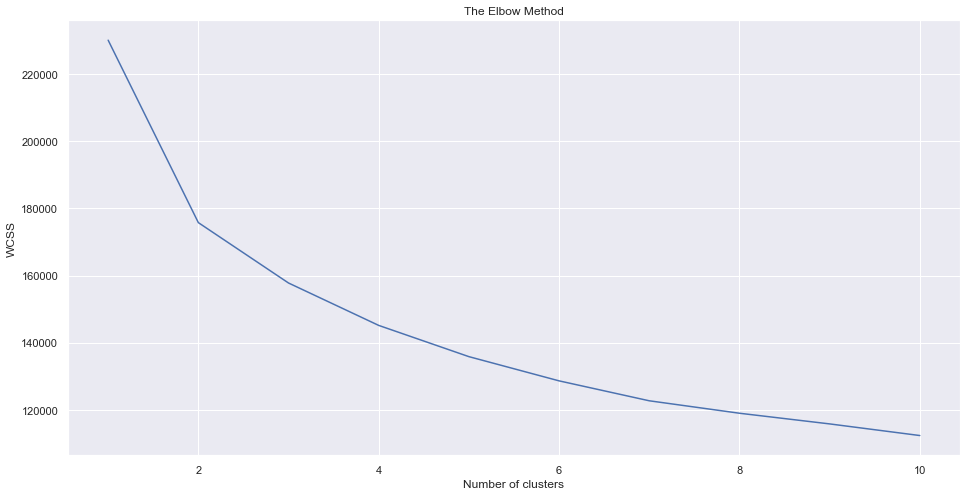

In [161]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    y_kmeans = kmeans.fit_predict(x)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


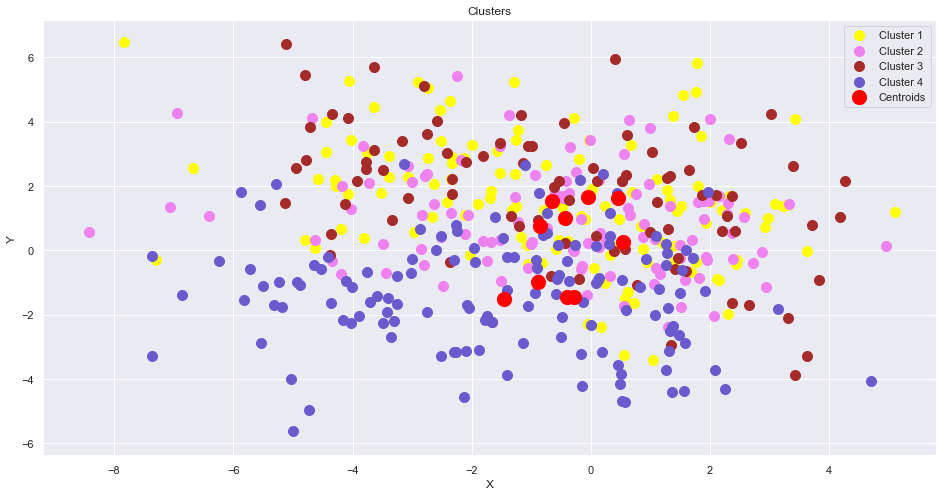

In [162]:
#Plotting clusters for my dataset

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'violet', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'brown', label = 'Cluster 3') 
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'slateblue', label = 'Cluster 4') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# PERFORMANCE MEASURES


##### 2 types of Performance measures were used to study the performance of our model:- <br/><br/> 1.Davies Bouldin Score : - The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. <br/><br/> 2. Silhouette Score : -The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters .The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. Score should be closer to 1 than -1.

In [163]:
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import silhouette_score

In [164]:
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)

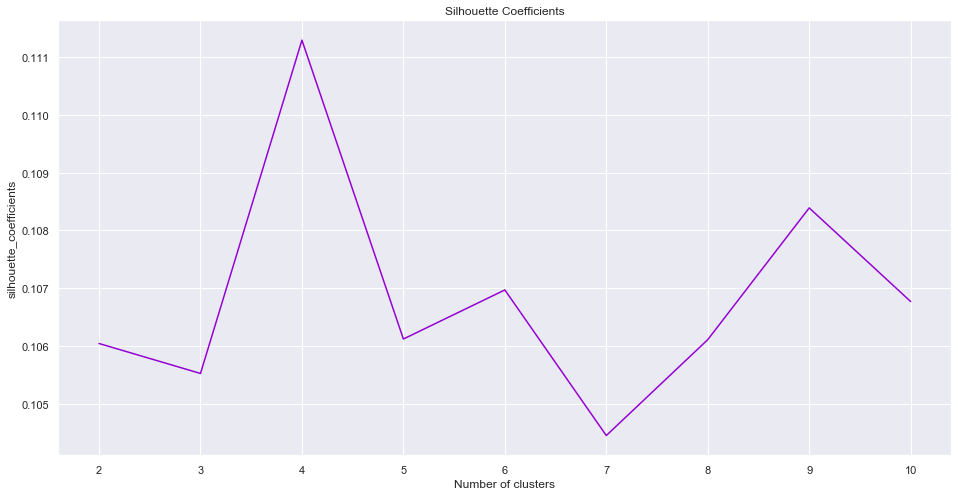

In [165]:
plt.plot(range(2, 11), silhouette_coefficients,c='darkviolet')
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()

In [166]:
# for n_clusters = 2
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(x)

kmeans_silhouette = silhouette_score(x, kmeans.labels_)

print('silhoutte value : ',kmeans_silhouette)

labels = kmeans.labels_
print('DB index: ',davies_bouldin_score(x, labels)) 


silhoutte value :  0.20444446143656647
DB index:  1.7252862899286228


In [167]:
# for n_clusters = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(x)


kmeans_silhouette = silhouette_score(x, kmeans.labels_)

print('silhoutte value : ',kmeans_silhouette)

labels = kmeans.labels_
print('DB index: ',davies_bouldin_score(x, labels)) 


silhoutte value :  0.15970835954055174
DB index:  1.8263240679162538


In [168]:
# for n_clusters = 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(x)


kmeans_silhouette = silhouette_score(x, kmeans.labels_)

print('silhoutte value : ',kmeans_silhouette)

labels = kmeans.labels_
print('DB index: ',davies_bouldin_score(x, labels)) 

silhoutte value :  0.1335583403951797
DB index:  1.938942309976046


OUTCOME:

* SLIHOUTTE- For this bot cluster = 3 and cluster = 4 have similar values. But cluster = 2 have slightly larger value, so it is considered best.
As amongst all 3 values it is the one more close to 1 and hence the sample is far away from the neighboring clusters.

* DAVIES- BOULDIN INDEX (DB)- For this cluster = 2 is best value as it is the smallest and hence

# HIERARCHICAL CLUSTERING

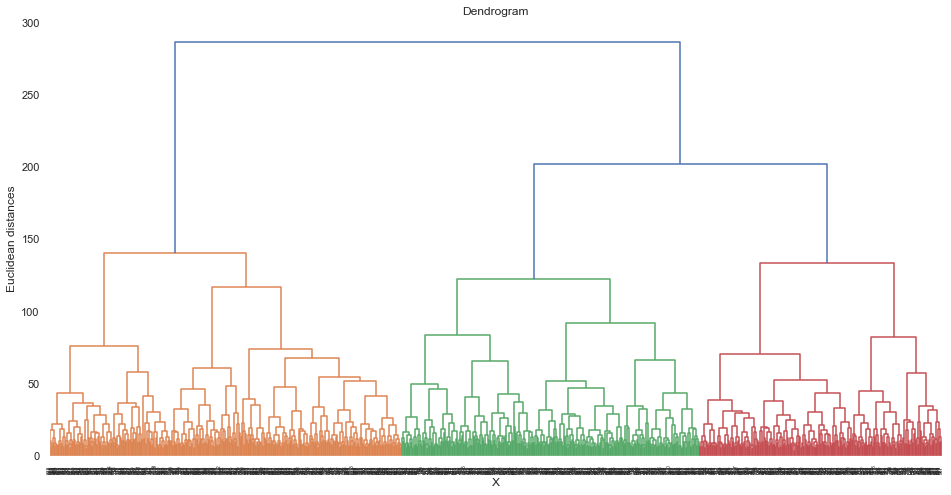

In [169]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('X')
plt.ylabel('Euclidean distances')
plt.show()

## Defining Function

In [170]:
from sklearn.cluster import KMeans, AgglomerativeClustering
singlelink = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
avglink = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
complink = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [171]:
single = singlelink.fit_predict(x)
average = avglink.fit_predict(x)
complete = complink.fit_predict(x)

# SINGLE LINKAGE

In [172]:
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import silhouette_score

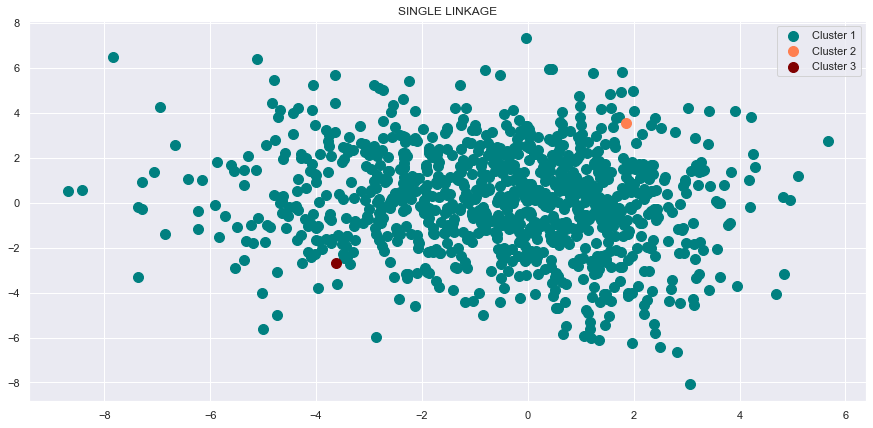

Db score : 0.48562535940555646
Ss score : 0.2769701011118697


In [173]:
plt.figure(figsize=(15,7))
plt.title("SINGLE LINKAGE")
plt.scatter(x[single == 0, 0], x[single == 0, 1], s = 100, c = 'teal', label = 'Cluster 1')
plt.scatter(x[single == 1, 0], x[single == 1, 1], s = 100, c = 'coral', label = 'Cluster 2')
plt.scatter(x[single == 2, 0], x[single == 2, 1], s = 100, c = 'maroon', label = 'Cluster 3')

plt.legend()
plt.show()

print("Db score :",davies_bouldin_score(x,single))
print("Ss score :",silhouette_score(x,single))

# COMPLETE LINKAGE

In [174]:
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import silhouette_score

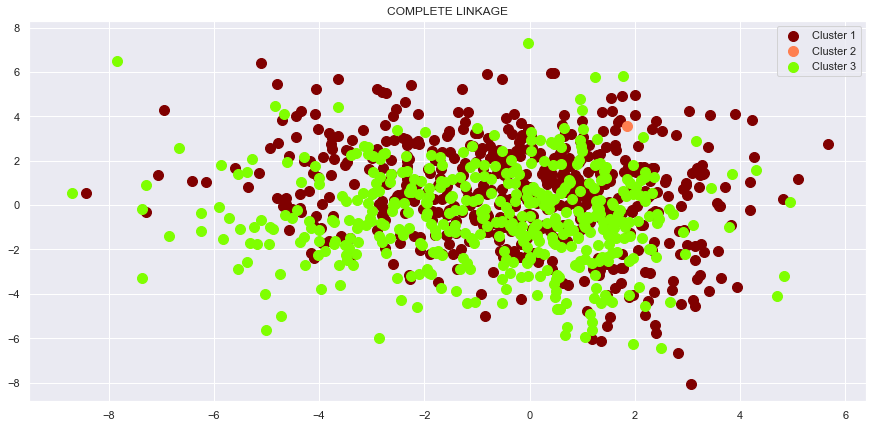

Db score : 1.4485577922567423
Ss score : 0.15458242008232176


In [175]:
plt.figure(figsize=(15,7))
plt.title("COMPLETE LINKAGE")
plt.scatter(x[complete == 0, 0], x[complete == 0, 1], s = 100, c = 'maroon', label = 'Cluster 1')
plt.scatter(x[complete == 1, 0], x[complete == 1, 1], s = 100, c = 'coral', label = 'Cluster 2')
plt.scatter(x[complete == 2, 0], x[complete == 2, 1], s = 100, c = 'chartreuse', label = 'Cluster 3')

plt.legend()
plt.show()

print("Db score :",davies_bouldin_score(x,complete))
print("Ss score :",silhouette_score(x,complete))

# AVERAGE LINKAGE

In [176]:
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import silhouette_score

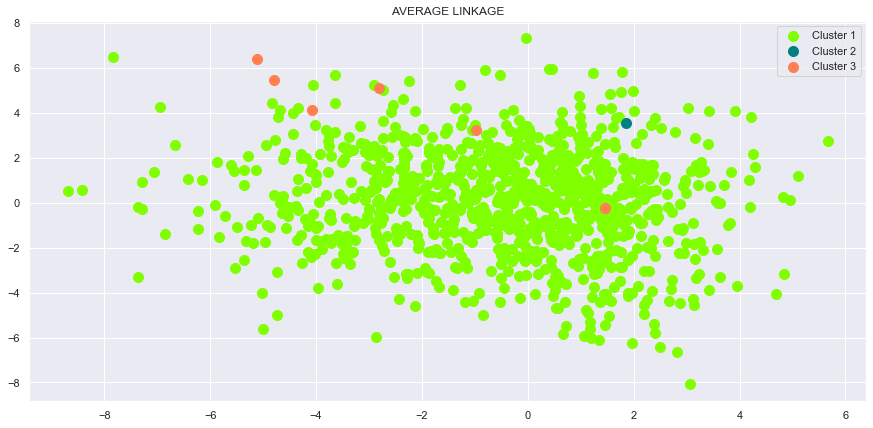

Db score : 0.764803492009082
Ss score : 0.30163472555658744


In [177]:
plt.figure(figsize=(15,7))
plt.title("AVERAGE LINKAGE")
plt.scatter(x[average == 0, 0], x[average == 0, 1], s = 100, c = 'chartreuse', label = 'Cluster 1')
plt.scatter(x[average == 1, 0], x[average == 1, 1], s = 100, c = 'teal', label = 'Cluster 2')
plt.scatter(x[average == 2, 0], x[average == 2, 1], s = 100, c = 'coral', label = 'Cluster 3')

plt.legend()
plt.show()

print("Db score :",davies_bouldin_score(x,average))
print("Ss score :",silhouette_score(x,average))

# RESULTS

In [178]:
import pandas as pd
data = {'Model': ['SINGLE LINKAGE', 'COMPLETE LINKAGE' , 'AVERAGE LINKAGE' ], 'DB SCORE': [.48,1.44,.76] , 'SS SCORE' : [.27,.15,.30]}
df = pd.DataFrame(data)
print(df)

              Model  DB SCORE  SS SCORE
0    SINGLE LINKAGE      0.48      0.27
1  COMPLETE LINKAGE      1.44      0.15
2   AVERAGE LINKAGE      0.76      0.30
